# Pandas: maken en visualiseren van dataframes

## 1 Maken van dataframe uit csv-bestand
- Lees 'sales data-set.csv'in als het dataframe sales waarbij je de 'Date' kolom als datetime kolom instelt.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sales = pd.read_csv('sales data-set.csv', parse_dates = ['Date'], dayfirst = True)

## 2 Inspecteren
- Voer de basis inspecteerfuncties uit om inzicht te krijgen in het dataframe.
    - Wat is de mediane omzet?
    - Wat is het hoogste winkelnummer?
    - Welke datatypes zijn er?

In [12]:
# Perform the basic inspect functions to gain insight into the data frame.
# What is the median turnover? 50%_weekly_sales = 7612.030000
# What is the highest store number? max_store = 45
# What data types are there?

# Descriptive statistics include those that summarize the central tendency, 
# dispersion and shape of a dataset’s distribution, excluding NaN values.
# Analyzes both numeric and object series, as well as DataFrame column sets 
# of mixed data types. The output will vary depending on what is provided. 
# Refer to the notes below for more detail.

display(sales.info(), sales.head(), sales.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Year          421570 non-null  int64         
 6   Week          421570 non-null  UInt32        
dtypes: UInt32(1), bool(1), datetime64[ns](1), float64(1), int64(3)
memory usage: 18.5 MB


None

,Store,Dept,Date,Weekly_Sales,IsHoliday,Year,Week
0,1,1,2010-02-05,24924.50,False,2010,5
1,1,1,2010-02-12,46039.49,True,2010,6
2,1,1,2010-02-19,41595.55,False,2010,7
3,1,1,2010-02-26,19403.54,False,2010,8
4,1,1,2010-03-05,21827.90,False,2010,9


,Store,Dept,Weekly_Sales,Year,Week
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,2010.968591,25.826762
std,12.785297,30.492054,22711.183519,0.796876,14.151887
min,1.000000,1.000000,-4988.940000,2010.000000,1.000000
25%,11.000000,18.000000,2079.650000,2010.000000,14.000000
50%,22.000000,37.000000,7612.030000,2011.000000,26.000000
75%,33.000000,74.000000,20205.852500,2012.000000,38.000000
max,45.000000,99.000000,693099.360000,2012.000000,52.000000


## 3 Omzet per week
- Importeer de pyplot module van matplotlib
- Voeg de kolom 'Year' en 'Week' toe aan het dataframe met daarin het jaar en het weeknummer uit de 'Date' kolom.
- Maak sales_2011 met daarin alleen de regels uit 2011.
- Maak sales_2011_by_date waarin je de omzet (Weekly_Sales) optelt per week.
- Toon een lijngrafiek met daarin de omzet per week.

,Store,Dept,Date,Weekly_Sales,IsHoliday,Year,Week
0,1,1,2010-02-05,24924.50,False,2010,5
1,1,1,2010-02-12,46039.49,True,2010,6
2,1,1,2010-02-19,41595.55,False,2010,7
3,1,1,2010-02-26,19403.54,False,2010,8
4,1,1,2010-03-05,21827.90,False,2010,9


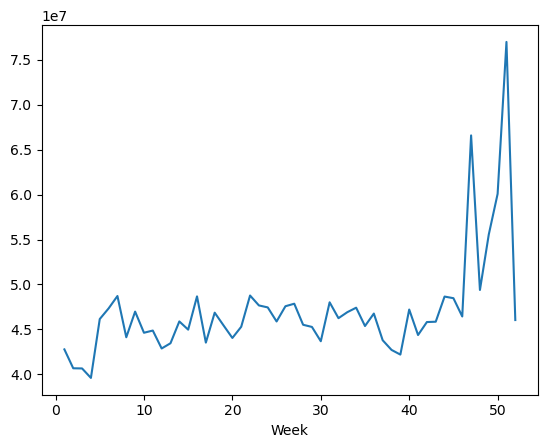

In [3]:
# Add the column 'Year' and 'Week' to the data frame containing the year 
#and week number from the 'Date' column.
sales["Year"] = sales["Date"].dt.year
sales["Week"] = (sales["Date"].dt.isocalendar().week)
display(sales.head())

# Create sales_2011 containing only the 2011 lines.
sales_2011 = sales[sales["Year"] == 2011]

# Create sales_2011_by_date in which you add up the turnover (Weekly_Sales) per week.
sales_2011_by_date = sales_2011.groupby(by = "Week")["Weekly_Sales"].sum()


# Show a line graph showing the turnover per week.
sales_2011_by_date.plot(kind = "line", x = "Week", y = "Weekly_Sales")
plt.show()




## 4 Sales per year
- Maak het dataframe sales_by_year met daarin de totale omzet (Weekly_Sales) per jaar. 
- Toon een barchart met daarin de omzet per jaar.

Year
2010    2.288886e+09
2011    2.448200e+09
2012    2.000133e+09
Name: Weekly_Sales, dtype: float64

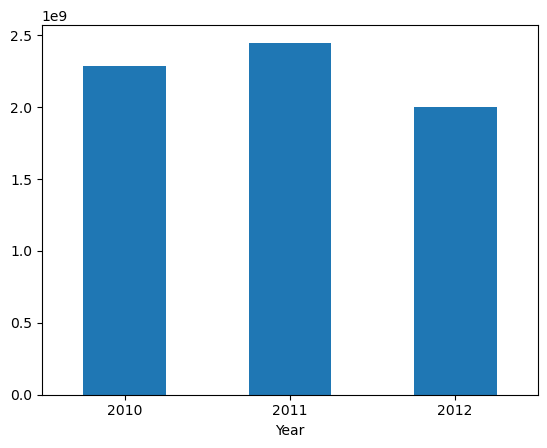

In [4]:
# Create the data frame sales_by_year containing the total revenue (Weekly_Sales) per year.
sales_by_year = sales.groupby(by = "Year")["Weekly_Sales"].sum()
display(sales_by_year.head())

# Show a bar chart showing the turnover per year.
sales_by_year.plot.bar(x = "Year", y = "Weekly_Sales", rot = 360)
plt.show()



## 5 Read feature data
- Lees 'Features data set.csv' in als het dataframe features waarbij je de 'Date' kolom als datetime kolom instelt.

In [5]:
# Read in 'Features data set.csv' as the features dataframe 
# where you set the 'Date' column as datetime column.

features = pd.read_csv("Features data set.csv")
display(features.head())

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


## 6 Ontbrekende gegevens
- Maak een staafdiagram waarin het aantal missende waardes per kolom wordt getoond.

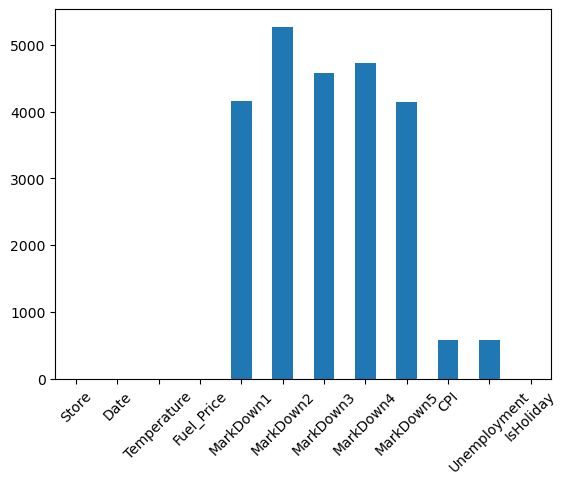

In [6]:
#Create a bar chart showing the number of missing values per column.
#features.isna.plot(kind = "bar")
features.isna().sum().plot.bar(rot = 45)
plt.show()

## 7 Vullen van missende waardes
- Maak features_filled waarin je de missende waardes vervangt door 0.
- Maak een leeg staafdiagram waarmee je laat zien dat er geen missende waardes meer zijn.

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False


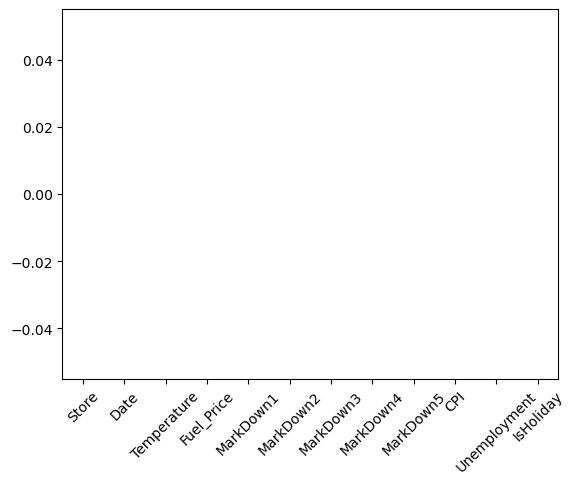

In [7]:
# Create features_filled where you replace the missing values with 0.
features_filled = features.replace(np.nan, 0)
display(features_filled.head())
# Create an empty bar chart to show that there are no more missing values.
features_filled.isna().sum().plot.bar(rot = 45)
plt.show()

## 8 Exporteren als CSV-bestand
- Maak een csv-bestand van sales_by_year.

In [8]:
#Create a csv file of sales_by_year.
sales_by_year.to_csv("sales_by_year.csv", header=True)

## 9 Histogram
- Maak een histogram van de omzet (Weekly_Sales) in sales?
- Wat maak je op uit dit histogram?

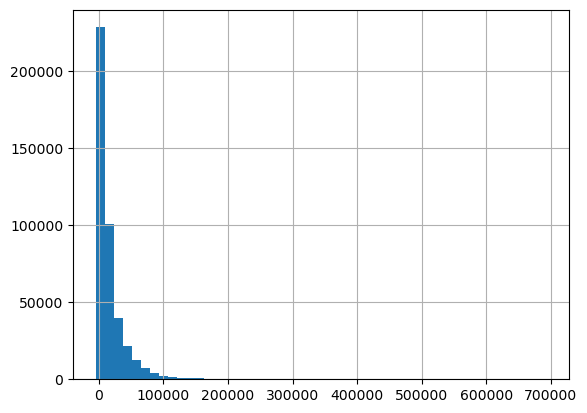

In [9]:
# Make a histogram of the turnover (Weekly_Sales) in sales?
sales["Weekly_Sales"].hist(bins=50)
plt.show()

# What do you make out of this histogram?

- Bereken de mediaan en het gemiddelde van de omzet (Weekly_Sales)
- Wat verklaart het grote verschil?

In [10]:
# Calculate the Median and Average of Sales (Weekly_Sales)
weekly_sales_median = sales["Weekly_Sales"].median()
weekly_sales_avg = sales["Weekly_Sales"].mean()

display(weekly_sales_median)
display(weekly_sales_avg)
# What explains the big difference?

7612.03

15981.258123467243

- Maak een histogram met 12 bins voor de alleen de omzetten tussen 0 en 30000.
- Welke range van omzet komt het meeste voor?
- Is dit de omzet per?  
A) week  
B) week / winkel  
C) week / winkel / afdeling  

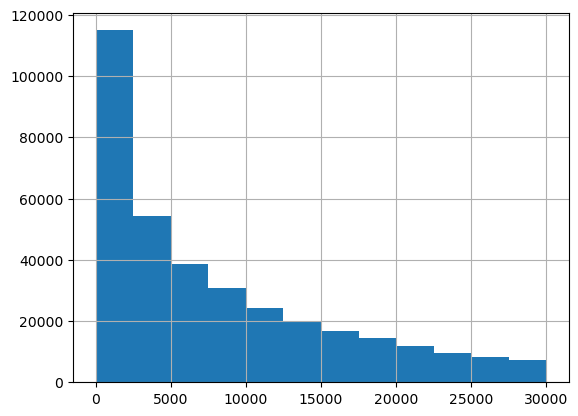

In [11]:
# Create a histogram with 12 bins for only the conversions between 0 and 30000.
# Which range of turnover is most common?
# Is this the turnover per?
# a) week
# B) week / shop
# C) week / shop / department


sales['Weekly_Sales'].hist(bins=12,range=(0,30000))
plt.show()
#tussen 0 en 2500
#C)date/store/department